In [1]:
import numpy as np
from numpy.linalg import inv
from matplotlib import pyplot as plt
import pandas as pd

address = 'D:/HomeWork/Machine Learning/ML-HW01/ML-HW01/dataset1/dataset1.csv'
df = pd.read_csv(address)
data = df.sample(frac=1)

In [2]:
#create new data for multivariate gradient descent
data['x0']=data['x']**0
data['x2']=data['x']**2
data['x3']=data['x']**3
data['x4']=data['x']**4
data['x5']=data['x']**5
data['x6']=data['x']**6
data['x7']=data['x']**7
data['x8']=data['x']**8
data['x9']=data['x']**9
data['x10']=data['x']**10

#change columns for better access
newY = data.pop('y')
x0 = data.pop('x0')

data.insert(0, 'y', newY)
data.insert(1, 'x0', x0)

#insert data in arrays
y = data.iloc[:, 0].values
X = data.iloc[:, 1:12].values

mainX = data.iloc[:,2].values

data.head(5)

,y,x0,x,x2,x3,x4,x5,x6,x7,x8,x9,x10
1,0.846452,1.0,0.430379,0.185226,0.079717,0.034309,0.014766,0.006355,0.002735,0.001177,5.065907e-04,2.180259e-04
13,-0.061816,1.0,0.851193,0.724530,0.616715,0.524944,0.446829,0.380337,0.323741,0.275566,2.345598e-01,1.996558e-01
190,-0.742205,1.0,-0.203558,0.041436,-0.008435,0.001717,-0.000349,0.000071,-0.000014,0.000003,-6.000552e-07,1.221460e-07
118,-0.603117,1.0,0.763471,0.582888,0.445018,0.339758,0.259395,0.198041,0.151198,0.115435,8.813157e-02,6.728587e-02
43,2.158043,1.0,-0.879549,0.773607,-0.680425,0.598467,-0.526381,0.462978,-0.407212,0.358163,-3.150218e-01,2.770771e-01


In [3]:
def cost_function_MSE(X, Y, theta):
    m = len(Y)
    J = np.sum((X.dot(theta)-Y) ** 2)/(2 * m)
    return J

In [4]:
def normal_equation(X, Y):
    m = len(Y)
    
    XtX =np.dot(X.T,X)
    XX = inv(XtX)
    
    XtY = np.dot(X.T , Y)
    
    theta = np.dot(XX , XtY)
    
 # New Cost Value
    cost = cost_function_MSE(X, Y, Theta)
 
    return theta , cost

In [5]:
#60% of data for train
#40% of data for test
m = 180

X_train = X[:m]
mainX_train = X[:m , 1]
y_train = y[:m]

X_test = X[m: , 1]
y_test = y[m:]

In [6]:
# Initial Coefficients
Theta = np.zeros(X_train.shape[1])

newTheta, cost_history = normal_equation(X_train, y_train)

# print(newTheta)

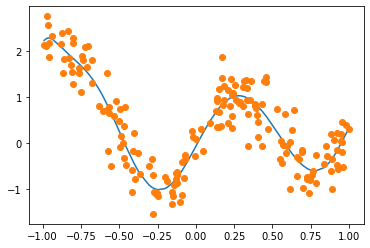

In [7]:
# plot
sorted_X_train = np.sort(mainX_train)
# sorted_X_train = mainX_train
y_predict = [None] * len(sorted_X_train)

for i in range(len(sorted_X_train)):
    y_predict[i] = newTheta[0]+ newTheta[1]*sorted_X_train[i] + newTheta[2]*(sorted_X_train[i]**2) + newTheta[3]*(sorted_X_train[i]**3) + newTheta[4]*(sorted_X_train[i]**4) + newTheta[5]*(sorted_X_train[i]**5)+ newTheta[6]*(sorted_X_train[i]**6) + newTheta[7]*(sorted_X_train[i]**7) + newTheta[8]*(sorted_X_train[i]**8)+ newTheta[9]*(sorted_X_train[i]**9) + newTheta[10]*(sorted_X_train[i]**10)


plt.plot(sorted_X_train,y_predict)
plt.plot(mainX_train,y_train , linestyle='', marker='o')

plt.show()

In [8]:
#test
def pred(testData , Thetas):
    y_predict = [None] * len(testData)
    for i in range(len(testData)):
        y_predict[i] = Thetas[0]+ Thetas[1]*testData[i] + Thetas[2]*(testData[i]**2) + Thetas[3]*(testData[i]**3) + Thetas[4]*(testData[i]**4) + Thetas[5]*(testData[i]**5)+ Thetas[6]*(testData[i]**6) + Thetas[7]*(testData[i]**7) + Thetas[8]*(testData[i]**8)+ Thetas[9]*(testData[i]**9) + Thetas[10]*(testData[i]**10)
    
    return (y_predict)

In [9]:
def r2(y_,y):
    sst = np.sum((y-y.mean())**2)
    ssr = np.sum((y_-y)**2)
    r2 = 1-(ssr/sst)
    return(abs(r2))

In [10]:
y_ = pred(X_test,newTheta)

In [11]:
r2(y_,y_test)

0.8484183939622943